In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('data/metricas_usuarios.csv')

In [9]:
df.head()

,id_usuario,nombre_usuario,Demografico,Contenido,Colaborativo,Híbrido,Test,Demografico_precision,Demografico_recall,Demografico_f1,...,Colaborativo_precision,Colaborativo_recall,Colaborativo_f1,Híbrido_precision,Híbrido_recall,Híbrido_f1,Demografico_mae,Contenido_mae,Colaborativo_mae,Híbrido_mae
0,123,Usuario_123,"{18003: 93.06930693069307, 17438: 89.781021897...","{17534: np.float64(100.0), 17527: np.float64(9...","{np.float64(17369.0): np.float64(100.0), np.fl...",{np.float64(17369.0): np.float64(80.3076923076...,"{17365: 83.3333, 17367: 33.3333, 17369: 83.333...",0.937500,0.168539,0.285714,...,0.810345,0.528090,0.639456,0.721739,0.932584,0.813725,17.031302,38.503497,35.748455,37.909992
1,124,Usuario_124,"{18003: 93.06930693069307, 17430: 88.617886178...","{17411: np.float64(94.1747572815534), 17534: n...","{np.float64(17509.0): np.float64(100.0), np.fl...","{np.float64(17509.0): np.float64(86.5625), 174...","{17365: 33.3333, 17367: 33.3333, 17369: 83.333...",0.928571,0.120370,0.213115,...,0.941176,0.592593,0.727273,0.848000,0.981481,0.909871,16.777521,30.626101,39.023656,30.979890
2,125,Usuario_125,"{18001: 95.04950495049505, 18002: 91.089108910...","{17556: np.float64(99.00990099009901), 17557: ...","{np.float64(17431.0): np.float64(100.0), np.fl...",{np.float64(17431.0): np.float64(90.6060606060...,"{17365: 0.0, 17367: 0.0, 17369: 16.6667, 17371...",0.583333,0.111111,0.186667,...,0.800000,0.634921,0.707965,0.539130,0.984127,0.696629,42.792060,50.005156,33.822612,48.455383
3,126,Usuario_126,"{17549: 96.89922480620154, 18001: 95.049504950...","{17411: np.float64(94.1747572815534), 17534: n...","{np.float64(17393.0): np.float64(100.0), np.fl...",{np.float64(17393.0): np.float64(83.9416058394...,"{17365: 0.0, 17367: 83.3333, 17369: 83.3333, 1...",0.687500,0.362637,0.474820,...,0.809524,0.560440,0.662338,0.703125,0.989011,0.821918,35.352068,34.958171,31.660744,37.869551
4,127,Usuario_127,"{17411: 94.1747572815534, 17524: 94.1176470588...","{17513: np.float64(95.23809523809523), 18001: ...","{np.float64(17371.0): np.float64(100.0), np.fl...","{np.float64(17371.0): np.float64(100.0), np.fl...","{17365: 33.3333, 17367: 0.0, 17369: 0.0, 17371...",0.545455,0.233766,0.327273,...,0.666667,0.415584,0.512000,0.618182,0.883117,0.727273,48.187222,36.117246,31.977060,40.045516


In [10]:
df.columns

Index(['id_usuario', 'nombre_usuario', 'Demografico', 'Contenido',
       'Colaborativo', 'Híbrido', 'Test', 'Demografico_precision',
       'Demografico_recall', 'Demografico_f1', 'Contenido_precision',
       'Contenido_recall', 'Contenido_f1', 'Colaborativo_precision',
       'Colaborativo_recall', 'Colaborativo_f1', 'Híbrido_precision',
       'Híbrido_recall', 'Híbrido_f1', 'Demografico_mae', 'Contenido_mae',
       'Colaborativo_mae', 'Híbrido_mae'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

# Definir una función para graficar precisión, recall y F1 score para cada recomendador
def graficar_metricas_srs(df, metricas_srs, metricas_labels, title, ylabel):
    # Definir los colores para cada métrica
    colores = ['b', 'g', 'r']  # Azul, verde y rojo para precisión, recall y f1 respectivamente
    
    # Crear una gráfica para cada recomendador
    for i, sr in enumerate(metricas_srs):
        plt.figure(figsize=(10,6))  # Crear una nueva figura para cada SR
        # Graficar las tres métricas en la misma gráfica
        plt.plot(df['nombre_usuario'], df[sr['precision']], label=f'{metricas_labels[i]} - Precisión', color=colores[0])
        plt.plot(df['nombre_usuario'], df[sr['recall']], label=f'{metricas_labels[i]} - Recall', color=colores[1])
        plt.plot(df['nombre_usuario'], df[sr['f1']], label=f'{metricas_labels[i]} - F1 Score', color=colores[2])

        # Configurar la gráfica
        plt.title(f'{title} - {metricas_labels[i]}')
        plt.xlabel('Usuario')
        plt.ylabel(ylabel)
        plt.xticks(rotation=45)  # Girar los nombres de usuario si es necesario
        plt.legend(title="Métricas", loc='best')
        plt.grid(True)
        plt.ylim(0,1.2)

        # Mostrar la gráfica
        plt.show()

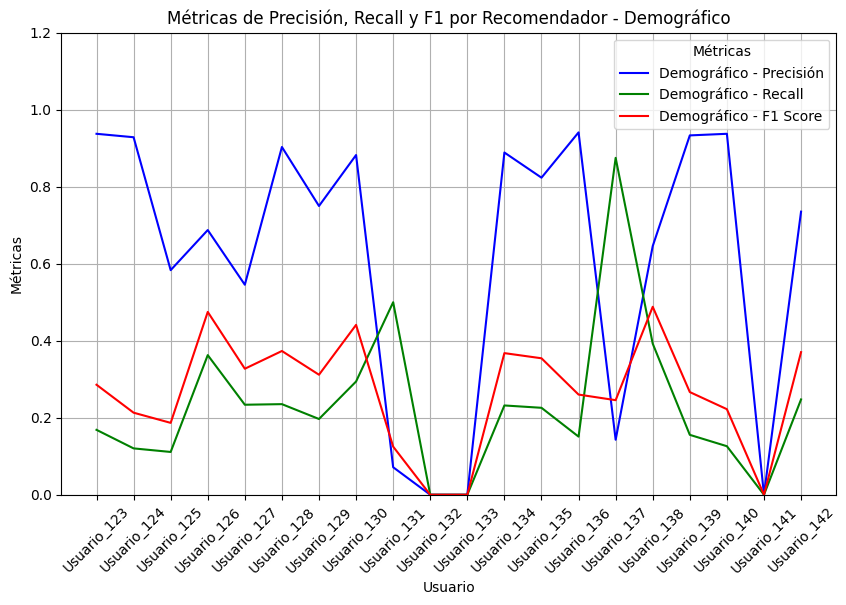

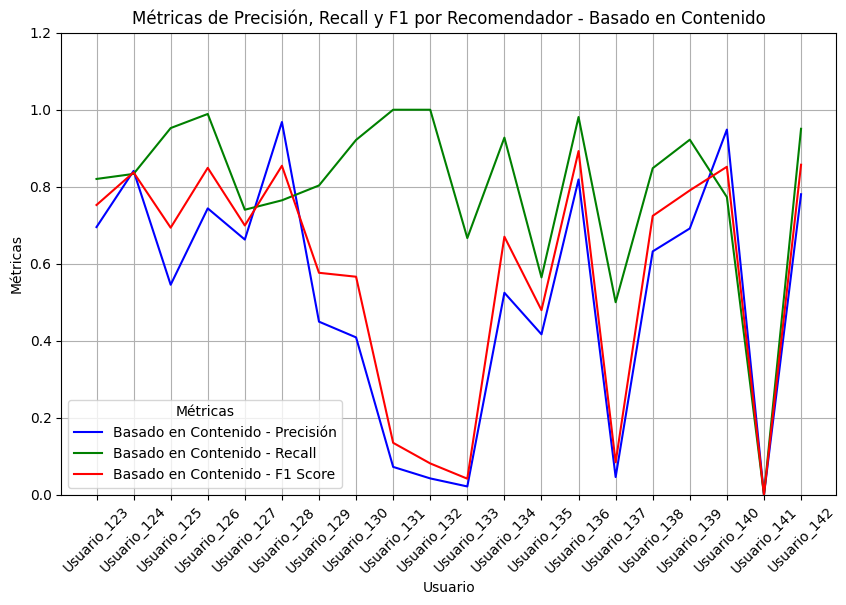

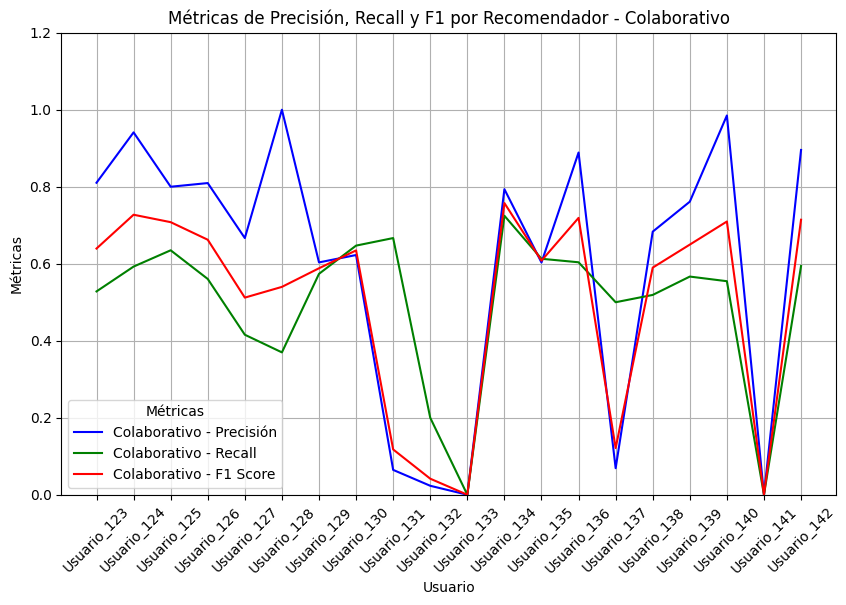

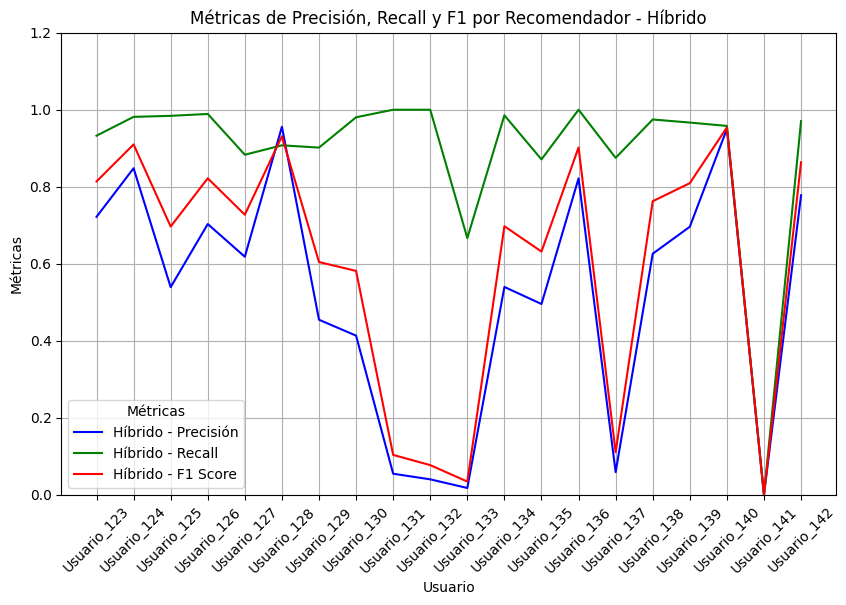

In [21]:

# Lista de recomendadores y sus respectivas métricas
metricas_srs = [
    {'precision': 'Demografico_precision', 'recall': 'Demografico_recall', 'f1': 'Demografico_f1'},
    {'precision': 'Contenido_precision', 'recall': 'Contenido_recall', 'f1': 'Contenido_f1'},
    {'precision': 'Colaborativo_precision', 'recall': 'Colaborativo_recall', 'f1': 'Colaborativo_f1'},
    {'precision': 'Híbrido_precision', 'recall': 'Híbrido_recall', 'f1': 'Híbrido_f1'}
]

# Lista de etiquetas de los recomendadores
metricas_labels = ['Demográfico', 'Basado en Contenido', 'Colaborativo', 'Híbrido']

# Título común para las gráficas
title = 'Métricas de Precisión, Recall y F1 por Recomendador'

# Llamar a la función para graficar las métricas para cada SR
graficar_metricas_srs(df, metricas_srs, metricas_labels, title, 'Métricas')

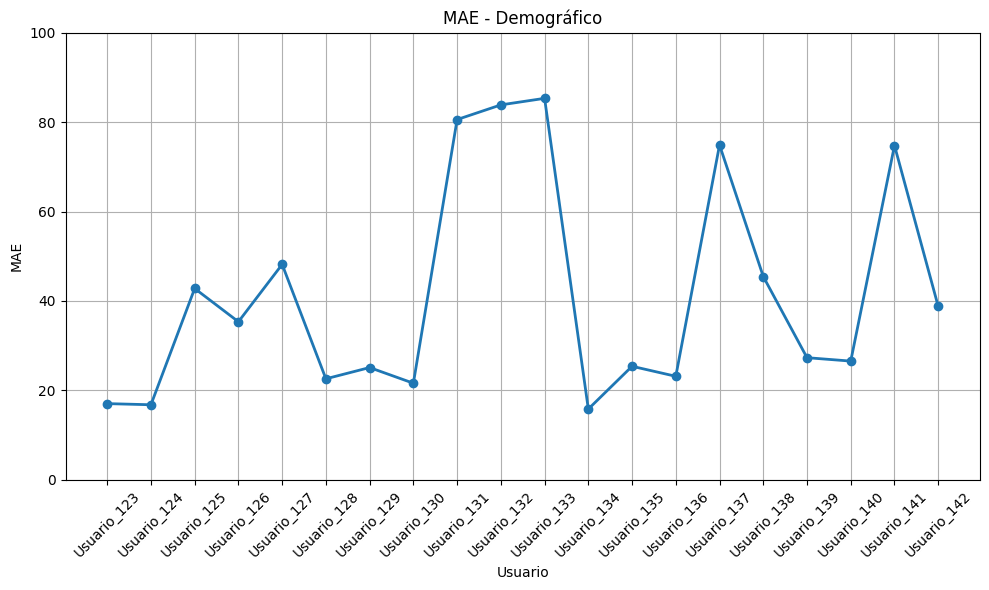

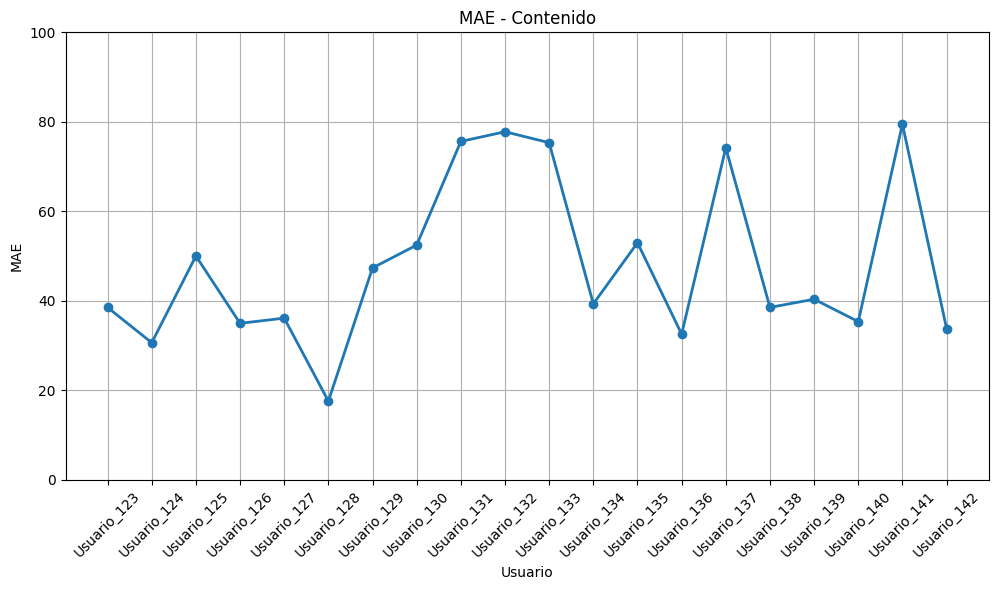

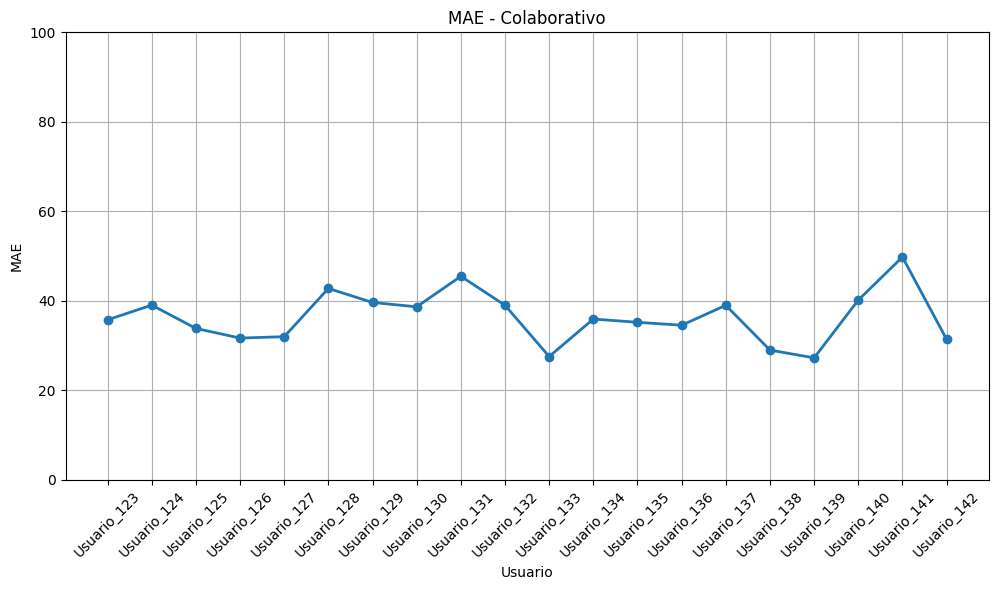

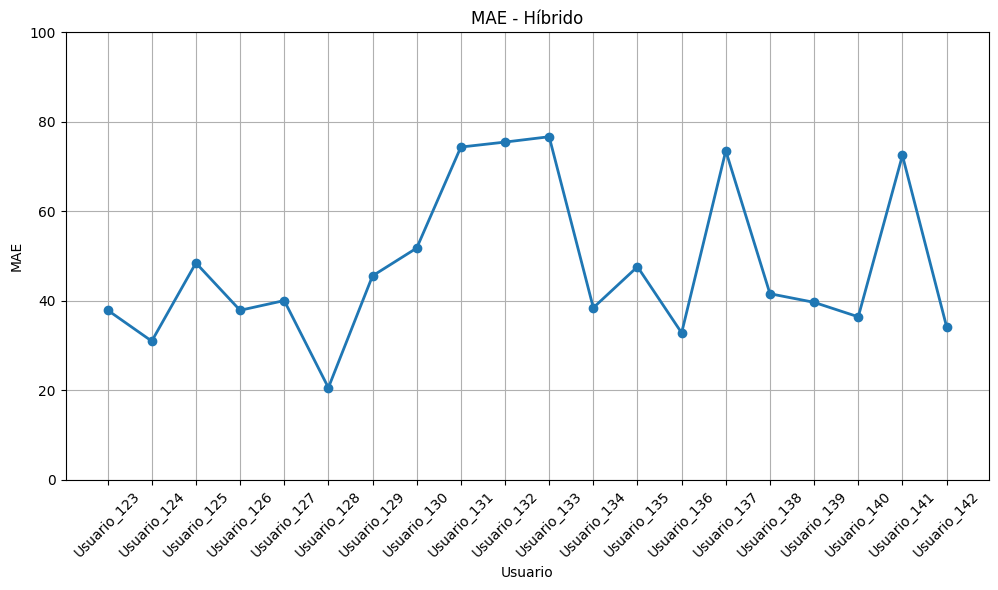

In [23]:
mae_columns = {
    'Demografico_mae': 'Demográfico',
    'Contenido_mae': 'Contenido',
    'Colaborativo_mae': 'Colaborativo',
    'Híbrido_mae': 'Híbrido'
}

# Line plot for each recommender system
for col, label in mae_columns.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df['nombre_usuario'], df[col], marker='o', label=f'{label}', linewidth=2)
    plt.title(f'MAE - {label}')
    plt.xlabel('Usuario')
    plt.ylabel('MAE')
    plt.xticks(rotation=45)
    plt.ylim(0, max(df[col]) * 1.2)
    plt.grid(True)
    plt.tight_layout()
    plt.ylim(0, 100)
    plt.show()


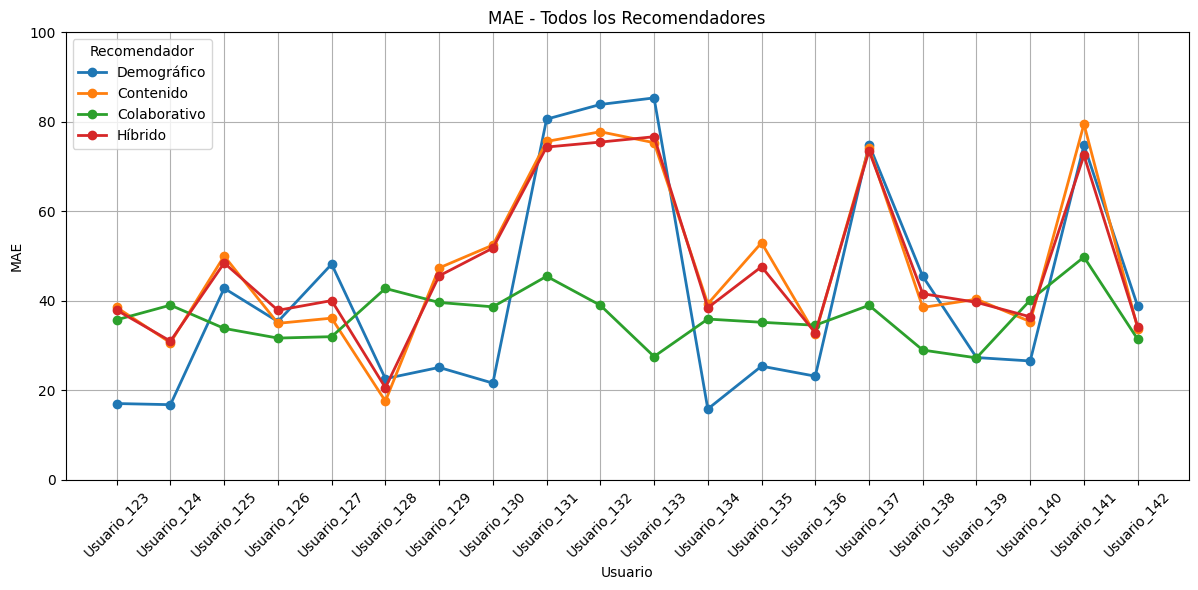

In [24]:
# Combined line plot for all recommenders
plt.figure(figsize=(12, 6))
for col, label in mae_columns.items():
    plt.plot(df['nombre_usuario'], df[col], marker='o', linewidth=2, label=label)

plt.title('MAE - Todos los Recomendadores')
plt.xlabel('Usuario')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Recomendador")
plt.tight_layout()
plt.ylim(0, 100)
plt.show()